{% cite holdgraf_evidence_2014 %}

[1]:http://www.quotedb.com/quotes/2112

In [1]:
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
install.packages("stablelearner", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpgDiE7z\downloaded_packages
package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpgDiE7z\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpgDiE7z\downloaded_packages
package 'stablelearner' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpgDiE7z\downloaded_packages


Warning message:
"package 'vcd' was built under R version 3.6.2"Loading required package: grid
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [20]:
# Load dataset
#ti <- read.csv("../datasets/titanic.csv", header = TRUE, sep=",")
#ti$Who <- "NA"
#ti$Who[ti$Sex=="male"] <- "man"
#ti$Who[ti$Sex=="female"] <- "woman"
#ti$Who[ti$Age<18] <- "child"
# Titanic filtered
#ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$Survived) |
#           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$Age) | ti$Ticket=="" | ti$Sex=="" ), ]
# Full titanic dataset: https://rdrr.io/cran/stablelearner/man/titanic.html
# Includes crew, which is needed or the simpson paradoxon
data("titanic", package = "stablelearner")
ti <- titanic

ti$who <- "NA"
ti$sex=ti$gender
ti$who[ti$sex=="male"] <- "man"
ti$who[ti$sex=="female"] <- "woman"
ti$who[ti$age<18] <- "child"
#ti <- ti[!( ti$name=="" | ti$gender=="" | is.na(ti$age) | ti$class=="" | ti$embarked=="" |
#           ti$survived=="" | ti$country=="" | is.na(ti$ticketno) | is.na(ti$fare) | 
#           is.na(ti$sibsp) | is.na(ti$parch)), ]
ti <- ti[!( ti$class=="" | ti$survived==""),]
#ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$survived) |
#           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$age) | ti$ticketno=="" | ti$gender=="" ), ]

#### 1. Lade den Datensatz Titanic in R. Beschreibe die Daten anhand der internen Hilfe (hilfreiche R Befehle: ?, help() )
 

In [3]:
help(ti)
str(ti)


'data.frame':	2207 obs. of  13 variables:
 $ name    : chr  "Abbing, Mr. Anthony" "Abbott, Mr. Eugene Joseph" "Abbott, Mr. Rossmore Edward" "Abbott, Mrs. Rhoda Mary 'Rosa'" ...
 $ gender  : Factor w/ 2 levels "female","male": 2 2 2 1 1 2 2 1 2 2 ...
 $ age     : num  42 13 16 39 16 25 30 28 27 20 ...
 $ class   : Factor w/ 7 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 2 2 3 3 ...
 $ embarked: Factor w/ 4 levels "B","C","Q","S": 4 4 4 4 4 4 2 2 2 4 ...
 $ country : Factor w/ 48 levels "Argentina","Australia",..: 44 44 44 15 30 44 17 17 26 16 ...
 $ ticketno: int  5547 2673 2673 2673 348125 348122 3381 3381 2699 3101284 ...
 $ fare    : num  7.11 20.05 20.05 20.05 7.13 ...
 $ sibsp   : Ord.factor w/ 9 levels "0"<"1"<"2"<"3"<..: 1 1 2 2 1 1 2 2 1 1 ...
 $ parch   : Ord.factor w/ 10 levels "0"<"1"<"2"<"3"<..: 1 3 2 2 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 2 2 ...
 $ who     : chr  "man" "child" "child" "woman" ...
 $ sex     : Factor w/ 2 levels "female","

No documentation for 'ti' in specified packages and libraries:
you could try '??ti'

#### 2. Untersuche den Titanic Datensatz mithilfe von Tabellen von absoluten und relativen Häufigkeiten der Ränder heruntergebrochen auf je 2 oder 3 Dimensionen von Variablen. (hilfreiche R Befehle: table(), ftable(), colSums, rowSums(), apply(), xtable())

In [4]:
invisible(table(ti$age, ti$fare))

#### 3. Stelle die Daten in geeigneter Weise graphisch dar (hilfreiche R Befehle: barplot(), mosaicplot(), assocplot())

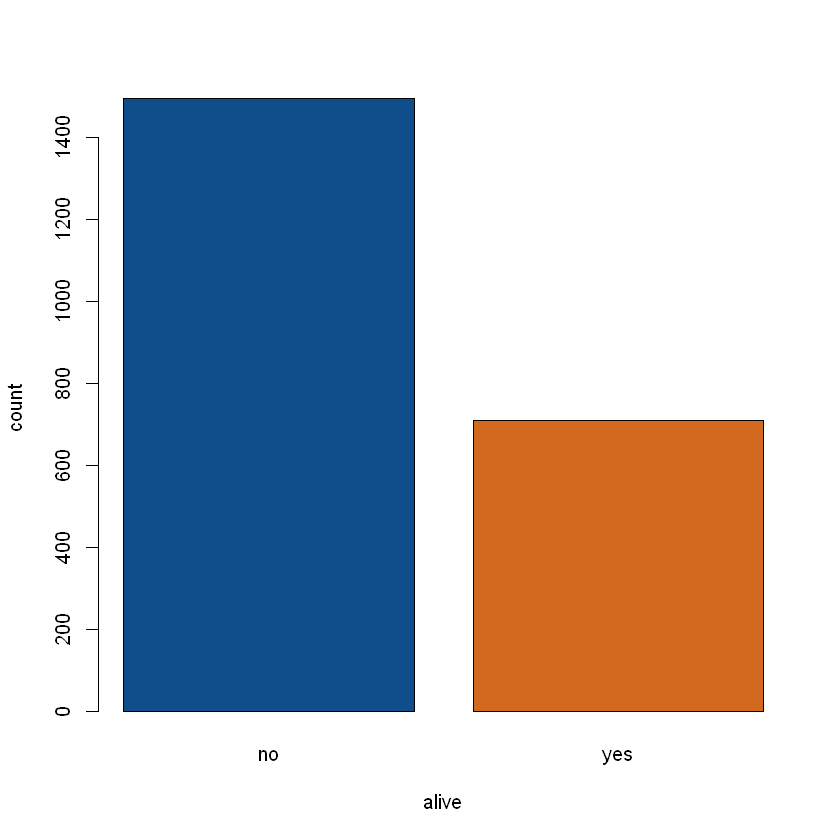

In [5]:
# Countplots in R: https://www.statmethods.net/graphs/bar.html
# Create counts from alive column
counts <- table(ti$survived)
barplot(counts, col=c("dodgerblue4", "chocolate"), xlab="alive", ylab="count")

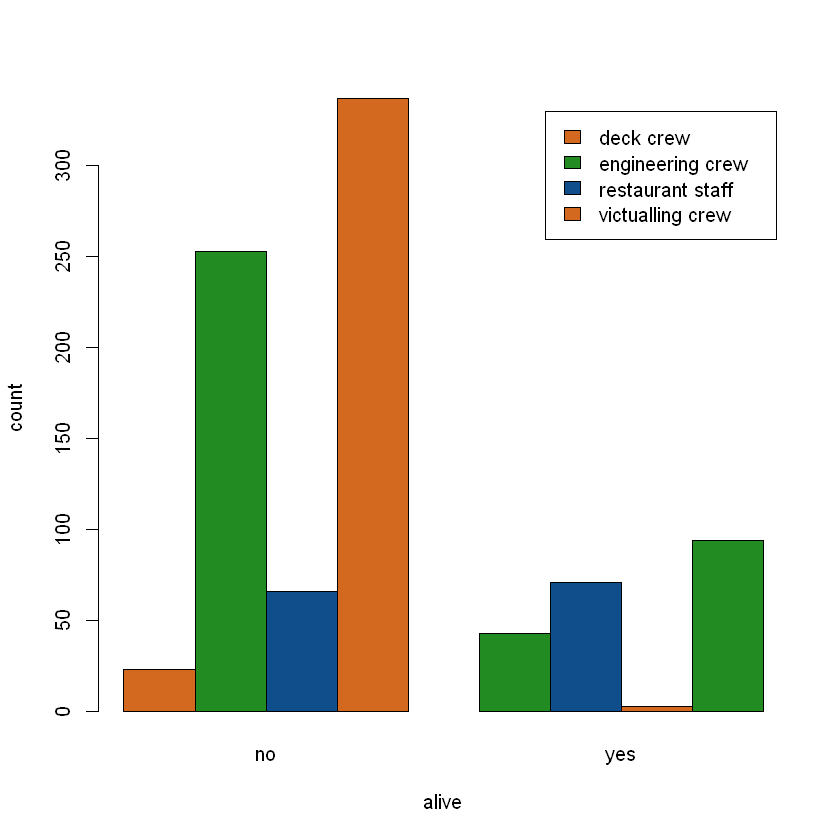

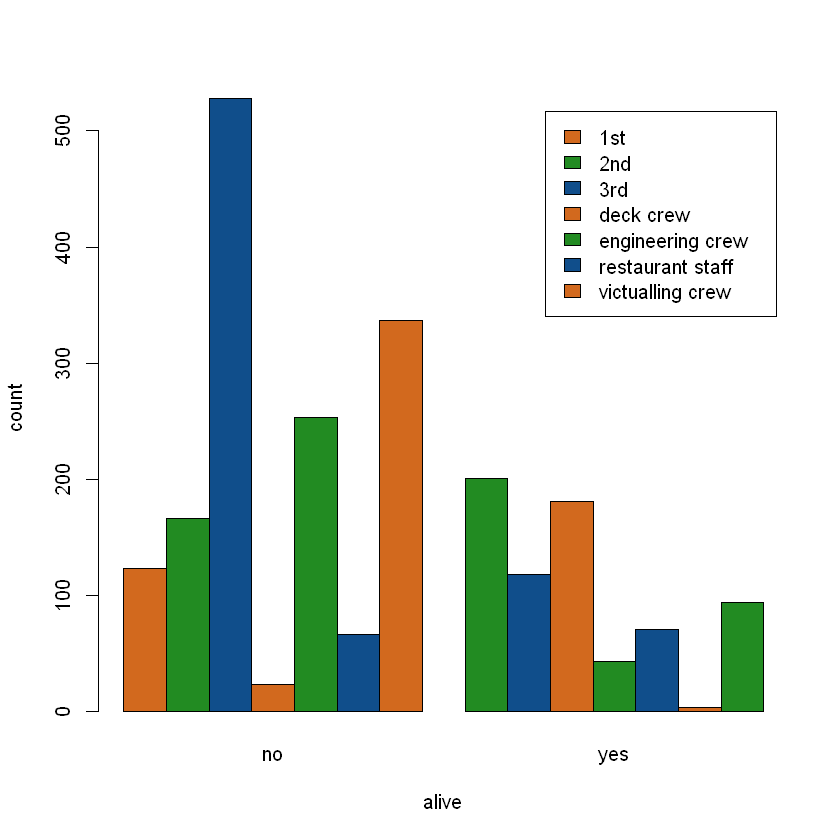

In [29]:
# Form a table with columns class and rows alive
counts <- table(ti$class[grepl("crew", ti$class) | grepl("staff", ti$class)],
                ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])
# Delete unused rows
# Source: https://stackoverflow.com/questions/37307307/remove-a-row-from-a-data-table-in-r
counts <- counts[-1:-3,]
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

counts <- table(ti$class, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

#### 4. Begründe anhand der quantitativen Ergebnisse, ob Frauen und Kinder zuerst bei der Seenotrettung berücksichtigt wurden.

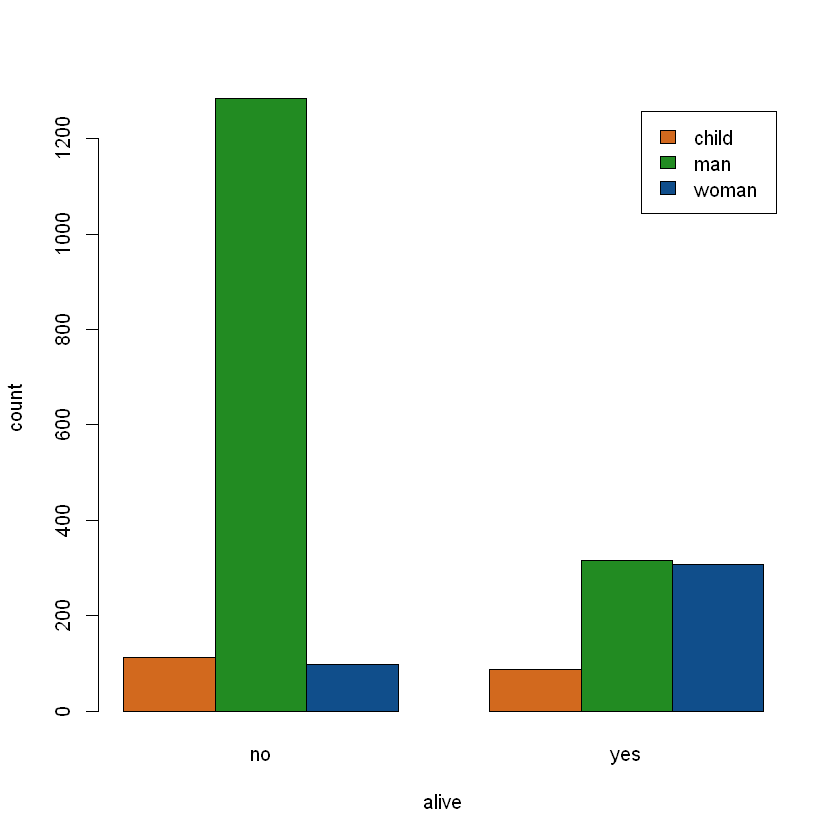

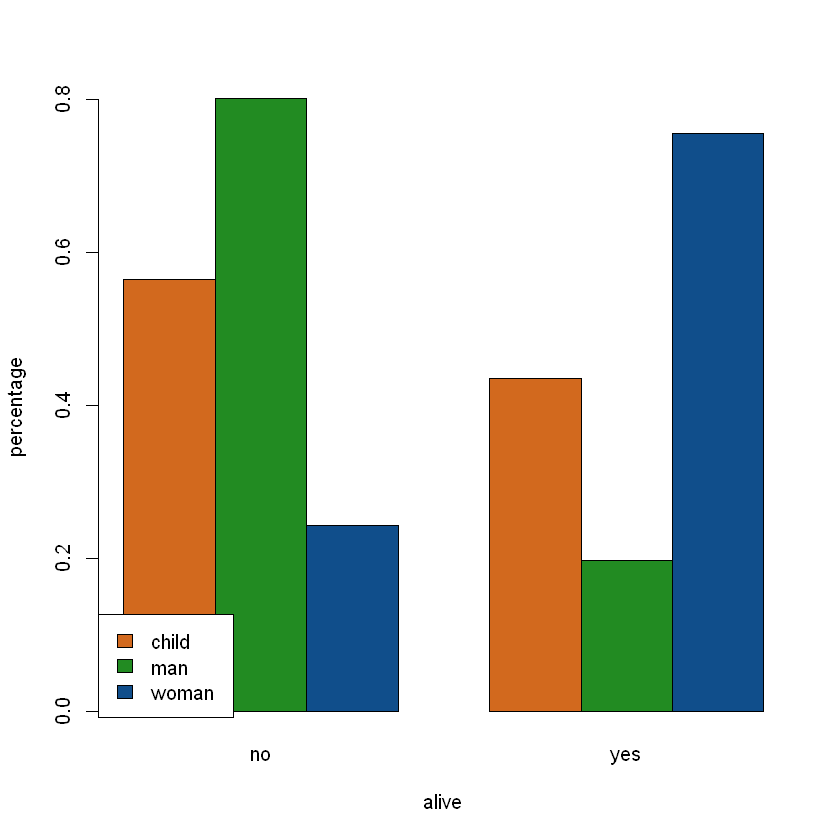

In [28]:
# Form a table with columns class and rows alive
counts <- table(ti$who, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
percentages <- matrix(c(
    length(ti$who[ti$who=="child" & ti$survived=="no"]) / length(ti$who[ti$who=="child"]),
    length(ti$who[ti$who=="man" & ti$survived=="no"]) / length(ti$who[ti$who=="man"]),
    length(ti$who[ti$who=="woman" & ti$survived=="no"]) / length(ti$who[ti$who=="woman"]),
    length(ti$who[ti$who=="child" & ti$survived=="yes"]) / length(ti$who[ti$who=="child"]),
    length(ti$who[ti$who=="man" & ti$survived=="yes"]) / length(ti$who[ti$who=="man"]),
    length(ti$who[ti$who=="woman" & ti$survived=="yes"]) / length(ti$who[ti$who=="woman"])
), ncol=2)
colnames(percentages) <- c("no", "yes")
rownames(percentages) <- c("child", "man", "woman")
percentages <- as.table(percentages)
barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    beside=TRUE, xlab="alive", ylab="percentage"
)
legend("bottomleft", legend=rownames(percentages), fill=c("chocolate", "forestgreen", "dodgerblue4"))




Frauen haben die höchste Überlebensrate, somit ist die Vermutung, dass diese zuerst bei der Rettung berücksichtigt wurden, ziemlich nahe liegend. Für Kinder wird dies wahrscheinlich auch zutreffen, jedoch sind Kinder, vorallem Kleinkinder, auf die Hilfe anderer angewiesen, weil sie z.B. nicht schwimmen können, was ihre Überlebensrate drastisch reduziert.

#### 5. Erkläre, wo sich Anzeichen für Simpson's Paradoxon finden lassen.

[1] 0.2370787

[1] 0.2552891

[1] 0

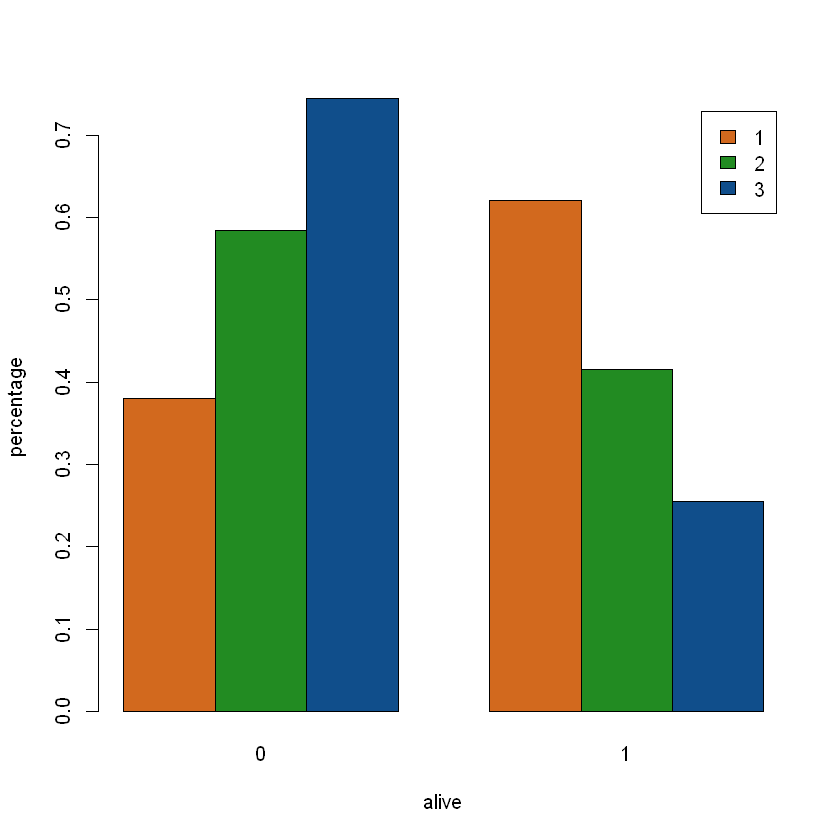

In [33]:
length(ti$survived[ti$survived=="yes" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
                   length(ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])
length(ti$survived[ti$survived=="yes" & ti$class=="3rd"]) /
                   length(ti$survived[ti$class=="3rd"])

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
length(ti$class[ti$class=="1st" & ti$survived==0]) / length(ti$class[ti$class=="1st"])
percentages <- matrix(c(
    length(ti$class[ti$class=="1st" & ti$survived=="no"]) / length(ti$class[ti$class=="1st"]),
    length(ti$class[ti$class=="2nd" & ti$survived=="no"]) / length(ti$class[ti$class=="2nd"]),
    length(ti$class[ti$class=="3rd" & ti$survived=="no"]) / length(ti$class[ti$class=="3rd"]),
    length(ti$class[ti$class=="1st" & ti$survived=="yes"]) / length(ti$class[ti$class=="1st"]),
    length(ti$class[ti$class=="2nd" & ti$survived=="yes"]) / length(ti$class[ti$class=="2nd"]),
    length(ti$class[ti$class=="3rd" & ti$survived=="yes"]) / length(ti$class[ti$class=="3rd"])
), ncol=2)
colnames(percentages) <- c(0, 1)
rownames(percentages) <- c(1, 2, 3)
percentages <- as.table(percentages)

barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(percentages), beside=TRUE, xlab="alive", ylab="percentage"
)


#### 6. Lade den Datensatz 'state.x77' in R. Beschreibe die Daten anhand der internen Hilfe.

In [ ]:
?state.x77

#### 7. Ermittle mithilfe geeigneter Schätzer für die Lage und Streuung der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder.

In [ ]:
state.x77[,'Population']
state.x77[,'Income']
state.x77[,'Illiteracy']
state.x77[,'Life Exp']
state.x77[,'Murder']

#### 8. Stelle die Daten der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder in geeigneter Weise graphisch dar. Verwende dafür wenigstens 2 unterschiedliche graphische Darstellungen.

#### 9. Begründe anhand der graphischen Darstellung, ob es sich symmetrische oder schiefe Datenverteilungen handelt. Begründe anhand der graphischen Darstellungen, ob schwere oder leichte Ränder vorliegen (und auf welcher Seite).

#### 10. Bestimme anhand graphischen Darstellungen aus Punkt 8. und der Erkenntnisse aus 9., ob Ausreißer vorliegen und welche Punkte dies sind.

{% bibliography --cited %}